# Assignment 4 - The Bias coin Reloaded
Matteo Scialpi

## Introduction
**Suppose that we have a coin, and we would like to figure out what the probability is that it will flip up heads with frequency $f$. How should we estimate the bias $f$?**

## Question 1

**The Binomial distribution is a suitable likelihood function for this problem. Derive an estimator of the bias maximizing the likelihood function (Maximum Likelihood method).**

Using the same notation from the toss coin that we did in the first part of the course, we can write the number of heads in $N$ total throws as $n_H$. This $n_H$ will represent our datas, while $f$ is the parameter we are interested in. Following the hint given about a Binomial distribution for the likelihood, it will be
\begin{equation}
\mathscr{L}(f)=\mathcal{P}(n_H|f,N)=\binom{N}{n_h}f^{n_H}(1-f)^{N-n_H}\,.
\end{equation}
Taking its natural logarithm, we have the log-likelihood, given by
\begin{equation}
\ln\mathscr{L}(f)=\ln{\binom{N}{n_H}}+n_H\,\ln{f}+(N-n_H)\,\ln{(1-f)}\,.
\end{equation}
We want to search the value for $f$ that maximises the log-likelihood, value that maximises the "linear" likelihood, too. Let's calculate the first $f$ derivative for $\mathscr{L}(f)$:
\begin{equation}
\frac{\partial\ln{\mathscr{L}}}{\partial f}=\frac{n_H}{f}-\frac{N-n_H}{1-f}=\frac{n_H-Nf}{f(1-f)}\,.
\end{equation}
The derivative will be set to 0 because of the search for the $f$ maximum-likelihood value. This estimator for $f$ will be labelled as $\hat{f}$. We have
\begin{equation}
\frac{\partial\ln{\mathscr{L}}}{\partial f}=0\qquad\implies\qquad\hat{f}=\frac{n_H}{N}\,,
\end{equation}
as we expected it to be by the simple frequency definition. Being the expectation value for the binomial distribution (taking the random variable $x=\{0,1\}$)
\begin{equation}
E[x]=Nf=n_H\,,
\end{equation} 
we can say that we can easily relate $\hat{f}$ to $E[x]$ as
\begin{equation}
\hat{f}=\frac{E[x]}{N}\,.
\end{equation}
For what concerns instead the error bar for $\hat{f}$, we have to calculate the second derivative with respect to $f$, strictly bound to the variance $\sigma_f^2$. It reads
\begin{equation}
\frac{\partial^2\ln{\mathscr{L}}}{\partial f^2}=\frac{\partial}{\partial f}\biggl[\frac{n_H-Nf}{f(1-f)}\biggr]=-\frac{Nf^2-2n_Hf+n_H}{f^2\,(1-f)^2}\,.
\end{equation}
This second derivative is equal to
\begin{equation}
\frac{\partial^2\ln{\mathscr{L}}}{\partial f^2}=-\frac{1}{\sigma_f^2},
\end{equation}
so we can write the errorbar for $f$ values
\begin{equation}
\sigma_f^2=\frac{f^2\,(1-f)^2}{Nf^2-2n_Hf+n_H}\,.
\end{equation}
In the end we can write the estimator for $f$ given by the maximum likelihood as
\begin{equation}
f=\hat{f}\pm\sigma_f=\hat{f}\pm\frac{\hat{f}\,(1-\hat{f})}{\sqrt{N\hat{f}^2-2n_H\hat{f}+n_H}}
\end{equation}
Substituting $\hat{f}$ derived before, we can write
\begin{equation}
\sigma_f^2=\frac{n_H}{N}\pm\frac{\sqrt{n_H\,(1-n_H/N)}}{N}\,.
\end{equation}
We can also see that, restoring $\hat{f}$ in the expression, we have
\begin{equation}
\sigma_f^2=\frac{n_H\,(1-n_H/N)}{N^2}=\frac{\hat{f}\,(1-\hat{f})}{N}=\frac{\sigma^2}{N^2}\,,
\end{equation}
where $\sigma^2$ is the variance for the binomial distribution.

### Point A
**Generate $N$=100 coin flips with an input bias $f$ of your choice. What is the estimated value of $f$ and error bars?**

Manca l'errore con il Newton-Raphson. \
Riprovare i punti A e B prendendo una binomiale da un pacchetto (scipy?) e calcolando $f$ e $\sigma_f$ in base alle relazioni con $E(x)$ e $\sigma$.


The coin is flipped 100 times with an intrinsic bias f = 0.3


Predicted f from theoretical formulas =  0.26 +/- 0.04386342439892262


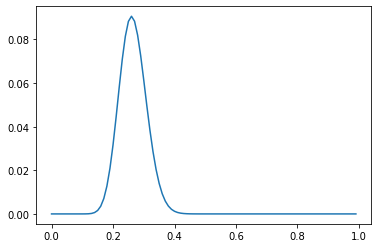

<ipython-input-1-8abdfde70762>:18: RuntimeWarning: divide by zero encountered in log
  return np.log(P)


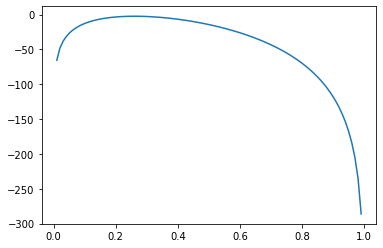

0.26


In [1]:
import numpy as np
import numpy.random as rnd
import scipy.special as sp
import matplotlib.pyplot as plt

### FUNCTIONS' DEFINITION

def like(f,N,n_H):
  N=float(N)
  coeff=sp.factorial(N)/(sp.factorial(n_H)*sp.factorial(N-n_H))
  P=coeff*(f**n_H*(1.-f)**(N-n_H))
  return P

def loglike(f,N,n_H):
  N=float(N)
  coeff=sp.factorial(N)/(sp.factorial(n_H)*sp.factorial(N-n_H))
  P=coeff*(f**n_H*(1.-f)**(N-n_H))
  return np.log(P)

def derloglike(f,N,n_H):
  N=float(N)
  dP=(n_H-N*f)/(f*(1.-f))
  return dP

def der2loglike(f,N,n_H):
  N=float(N)
  d2P=(-N*f*f+2.*n_H*f-n_H)/(f-f*f)**2.
  return d2P

def nwtrps(N,n_H):
  guess=0.5
  eps=1e-5
  guessold=10.
  while np.linalg.norm(guess-guessold)>eps:
    guessold=np.copy(guess)
    guess-=derloglike(guess,N,n_H)/der2loglike(guess,N,n_H)
  return guess

### PROBLEM SETTINGS AND THROWS
N=100
f_bias=0.3
rnd.seed(1)
flips=rnd.rand(N)
flips=np.where(flips<=1.-f_bias,0,1)
print(f'The coin is flipped {N} times with an intrinsic bias f = {f_bias}')
print('')
n_H=0
for i in range(len(flips)):
  if flips[i]==1:
    n_H+=1
n_H=float(n_H)

### THEORETICAL CALCULATIONS
f_theo=n_H/float(N)
var_theo=f_theo*(1-f_theo)/float(N)
print('')
print('Predicted f from theoretical formulas = ',f_theo,'+/-',np.sqrt(var_theo))

### NEWTON RAPHSON METHOD FOR LOG LIKELIHOOD
x=np.arange(0.,1.,0.01)
l=like(x,N,n_H)
plt.plot(x,l)
plt.show()

ll=loglike(x,N,n_H)
plt.plot(x,ll)
plt.show()

f_nr=nwtrps(N,n_H)
print(f_nr)

### Point B
**Given $N$=5 toss and 5 heads as outcome, what is the estimated value of $f$ and error bars?**

Il Newton-Raphson esplode perché quando $f_{guess}$ raggiunge 1 la derivata diverge a causa del fattore $(1-f)$.

[1 1 1 1 1]
Predicted f from theoretical formulas =  1.0 +/- 0.0


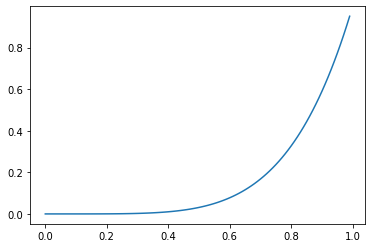

In [2]:
### PROBLEM SETTINGS AND THROWS
N=5
flips=np.ones(N,int)
print(flips)
n_H=0
for i in range(N):
  if flips[i]==1:
    n_H+=1
n_H=float(n_H)

f_theo=n_H/float(N)
var_theo=f_theo*(1.-f_theo)/float(N)
print('Predicted f from theoretical formulas = ',f_theo,'+/-',np.sqrt(var_theo))

l=like(x,N,n_H)
plt.plot(x,l)
plt.show()

#f_nr=nwtrps(N,n_H)
#print(f_nr)


### Point C
**Given the condition in *Point A* and then in *Point B*, try hypothesis testing with $H_0$ ("the coin is not biased") vs $H_1$ ("the coin is biased").**

## Question 2
**The Binomial distribution is a suitable likelihood function for this problem. Use as "conjugate prior" the Beta Distribution. Derive an estimator of the bias maximizing the posterior function (Maximum A Posteriori method).**

### Point A
**Generate $N$=100 coin flips with an input bias $f$ of your choice. What is the estimated value of $f$ and error bars?**

### Point B
**Given $N$=5 toss and 5 heads as outcome what is the estimated value of f and error bars?**

### Point C
**Given the condition in *Point A* and then in *Point B*, try hypothesis testing with $H_0$ ("the coin is not biased") vs $H_1$ ("the coin is biased").**

### Point D
**What happens to the MAP estimator when $N\rightarrow+\infty$?**

## Question 3
**Use Cobaya (or your preferred MCMC code) to infer the bias parameter, error bars and model testing**

## Question 4

|Scientist|$x_n$|
|:-:|:-:|
|A|-27.020|
|B|3.570|
|C|8.191|
|D|9.898|
|E|9.603|
|F|9.945|
|G|10.056|

